In [1]:
# EDA Notebook
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
# Set path to project root so we can import from src/
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.utils import load_appliance_energy_data


df = load_appliance_energy_data()
df.head()


date  lights     T1       RH_1    T2       RH_2     T3  \
0 2016-01-11 17:00:00      30  19.89  47.596667  19.2  44.790000  19.79   
1 2016-01-11 17:10:00      30  19.89  46.693333  19.2  44.722500  19.79   
2 2016-01-11 17:20:00      30  19.89  46.300000  19.2  44.626667  19.79   
3 2016-01-11 17:30:00      40  19.89  46.066667  19.2  44.590000  19.79   
4 2016-01-11 17:40:00      40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...   RH_9  T_out  Press_mm_hg  RH_out  \
0  44.730000  19.000000  45.566667  ...  45.53   6.60        733.5    92.0   
1  44.790000  19.000000  45.992500  ...  45.56   6.48        733.6    92.0   
2  44.933333  18.926667  45.890000  ...  45.50   6.37        733.7    92.0   
3  45.000000  18.890000  45.723333  ...  45.40   6.25        733.8    92.0   
4  45.000000  18.890000  45.530000  ...  45.40   6.13        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Appliances  
0   7.000000   63.000000        5.3  13.275433  13.275433          60  
1   6.666667   59.166667        5.2  18.606195  18.606195          60  
2   6.333333   55.333333        5.1  28.642668  28.642668          50  
3   6.000000   51.500000        5.0  45.410390  45.410390          50  
4   5.666667   47.666667        4.9  10.084097  10.084097          60  

[5 rows x 29 columns]

In [3]:
df = df.drop(columns=['lights'])

In [4]:
# Check for missing values
df.isnull().sum()

date           0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Appliances     0
dtype: int64

In [5]:
# Summary statistics for all numeric columns
df.describe().T

count                 mean                  min  \
date           19735  2016-03-20 05:30:00  2016-01-11 17:00:00   
T1           19735.0            21.686571                16.79   
RH_1         19735.0            40.259739            27.023333   
T2           19735.0            20.341219                 16.1   
RH_2         19735.0             40.42042            20.463333   
T3           19735.0            22.267611                 17.2   
RH_3         19735.0              39.2425            28.766667   
T4           19735.0            20.855335                 15.1   
RH_4         19735.0            39.026904                27.66   
T5           19735.0            19.592106                15.33   
RH_5         19735.0            50.949283               29.815   
T6           19735.0             7.910939               -6.065   
RH_6         19735.0            54.609083                  1.0   
T7           19735.0            20.267106                15.39   
RH_7         19735.0              35.3882                 23.2   
T8           19735.0            22.029107            16.306667   
RH_8         19735.0            42.936165                 29.6   
T9           19735.0            19.485828                14.89   
RH_9         19735.0            41.552401            29.166667   
T_out        19735.0              7.41258                 -5.0   
Press_mm_hg  19735.0           755.522602                729.3   
RH_out       19735.0            79.750418                 24.0   
Windspeed    19735.0             4.039752                  0.0   
Visibility   19735.0            38.330834                  1.0   
Tdewpoint    19735.0             3.760995                 -6.6   
rv1          19735.0            24.988033             0.005322   
rv2          19735.0            24.988033             0.005322   
Appliances   19735.0            97.694958                 10.0   

                             25%                  50%                  75%  \
date         2016-02-14 23:15:00  2016-03-20 05:30:00  2016-04-23 11:45:00   
T1                         20.76                 21.6                 22.6   
RH_1                   37.333333            39.656667            43.066667   
T2                         18.79                 20.0                 21.5   
RH_2                        37.9                 40.5                43.26   
T3                         20.79                 22.1                23.29   
RH_3                        36.9                38.53                41.76   
T4                         19.53            20.666667                 22.1   
RH_4                       35.53                 38.4            42.156667   
T5                       18.2775                19.39            20.619643   
RH_5                        45.4                49.09            53.663333   
T6                      3.626667                  7.3               11.256   
RH_6                      30.025                55.29            83.226667   
T7                          18.7            20.033333                 21.6   
RH_7                        31.5            34.863333                 39.0   
T8                         20.79                 22.1                23.39   
RH_8                   39.066667               42.375               46.536   
T9                          18.0                19.39                 20.6   
RH_9                        38.5                 40.9            44.338095   
T_out                       3.67                 6.92                 10.4   
Press_mm_hg           750.933333                756.1           760.933333   
RH_out                 70.333333            83.666667            91.666667   
Windspeed                    2.0             3.666667                  5.5   
Visibility                  29.0                 40.0                 40.0   
Tdewpoint                    0.9                 3.43                 6.57   
rv1                    12.497889            24.897653            37.5837

In [16]:
df.describe().head(10)

date            T1          RH_1            T2  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     21.686571     40.259739     20.341219   
min    2016-01-11 17:00:00     16.790000     27.023333     16.100000   
25%    2016-02-14 23:15:00     20.760000     37.333333     18.790000   
50%    2016-03-20 05:30:00     21.600000     39.656667     20.000000   
75%    2016-04-23 11:45:00     22.600000     43.066667     21.500000   
max    2016-05-27 18:00:00     26.260000     63.360000     29.856667   
std                    NaN      1.606066      3.979299      2.192974   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   
std        4.069813      2.006111      3.254576      2.042884      4.341321   

                 T5  ...     Windspeed    Visibility     Tdewpoint  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      19.592106  ...      4.039752     38.330834      3.760995   
min       15.330000  ...      0.000000      1.000000     -6.600000   
25%       18.277500  ...      2.000000     29.000000      0.900000   
50%       19.390000  ...      3.666667     40.000000      3.430000   
75%       20.619643  ...      5.500000     40.000000      6.570000   
max       25.795000  ...     14.000000     66.000000     15.500000   
std        1.844623  ...      2.451221     11.794719      4.195248   

                rv1           rv2    Appliances          hour           day  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      24.988033     24.988033     97.694958     11.502002     16.057411   
min        0.005322      0.005322     10.000000      0.000000      1.000000   
25%       12.497889     12.497889     50.000000      6.000000      9.000000   
50%       24.897653     24.897653     60.000000     12.000000     16.000000   
75%       37.583769     37.583769    100.000000     17.000000     23.000000   
max       49.996530     49.996530   1080.000000     23.000000     31.000000   
std       14.496634     14.496634    102.524891      6.921953      8.450998   

        day_of_week         month  
count  19735.000000  19735.000000  
mean       2.977249      3.101647  
min        0.000000      1.000000  
25%        1.000000      2.000000  
50%        3.000000      3.000000  
75%        5.000000      4.000000  
max        6.000000      5.000000  
std        1.985617      1.339200  

[8 rows x 32 columns]

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # forces parsing
# Extracting Features from the datetime column
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [7]:
# Separate numerical and categorical, dependent variable
numerical_features = df.select_dtypes(include='number')
categorical = df.select_dtypes(include='object')
dependent_variable = df['Appliances']

In [8]:
df.head()

date     T1       RH_1    T2       RH_2     T3       RH_3  \
0 2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1 2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2 2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3 2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4 2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...  Tdewpoint        rv1        rv2  \
0  19.000000  45.566667  17.166667  ...        5.3  13.275433  13.275433   
1  19.000000  45.992500  17.166667  ...        5.2  18.606195  18.606195   
2  18.926667  45.890000  17.166667  ...        5.1  28.642668  28.642668   
3  18.890000  45.723333  17.166667  ...        5.0  45.410390  45.410390   
4  18.890000  45.530000  17.200000  ...        4.9  10.084097  10.084097   

   Appliances  hour  day  day_of_week  day_name  month  month_name  
0          60    17   11            0    Monday      1     January  
1          60    17   11            0    Monday      1     January  
2          50    17   11            0    Monday      1     January  
3          50    17   11            0    Monday      1     January  
4          60    17   11            0    Monday      1     January  

[5 rows x 34 columns]

In [15]:
df.describe()

date            T1          RH_1            T2  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     21.686571     40.259739     20.341219   
min    2016-01-11 17:00:00     16.790000     27.023333     16.100000   
25%    2016-02-14 23:15:00     20.760000     37.333333     18.790000   
50%    2016-03-20 05:30:00     21.600000     39.656667     20.000000   
75%    2016-04-23 11:45:00     22.600000     43.066667     21.500000   
max    2016-05-27 18:00:00     26.260000     63.360000     29.856667   
std                    NaN      1.606066      3.979299      2.192974   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   
std        4.069813      2.006111      3.254576      2.042884      4.341321   

                 T5  ...     Windspeed    Visibility     Tdewpoint  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      19.592106  ...      4.039752     38.330834      3.760995   
min       15.330000  ...      0.000000      1.000000     -6.600000   
25%       18.277500  ...      2.000000     29.000000      0.900000   
50%       19.390000  ...      3.666667     40.000000      3.430000   
75%       20.619643  ...      5.500000     40.000000      6.570000   
max       25.795000  ...     14.000000     66.000000     15.500000   
std        1.844623  ...      2.451221     11.794719      4.195248   

                rv1           rv2    Appliances          hour           day  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      24.988033     24.988033     97.694958     11.502002     16.057411   
min        0.005322      0.005322     10.000000      0.000000      1.000000   
25%       12.497889     12.497889     50.000000      6.000000      9.000000   
50%       24.897653     24.897653     60.000000     12.000000     16.000000   
75%       37.583769     37.583769    100.000000     17.000000     23.000000   
max       49.996530     49.996530   1080.000000     23.000000     31.000000   
std       14.496634     14.496634    102.524891      6.921953      8.450998   

        day_of_week         month  
count  19735.000000  19735.000000  
mean       2.977249      3.101647  
min        0.000000      1.000000  
25%        1.000000      2.000000  
50%        3.000000      3.000000  
75%        5.000000      4.000000  
max        6.000000      5.000000  
std        1.985617      1.339200  

[8 rows x 32 columns]

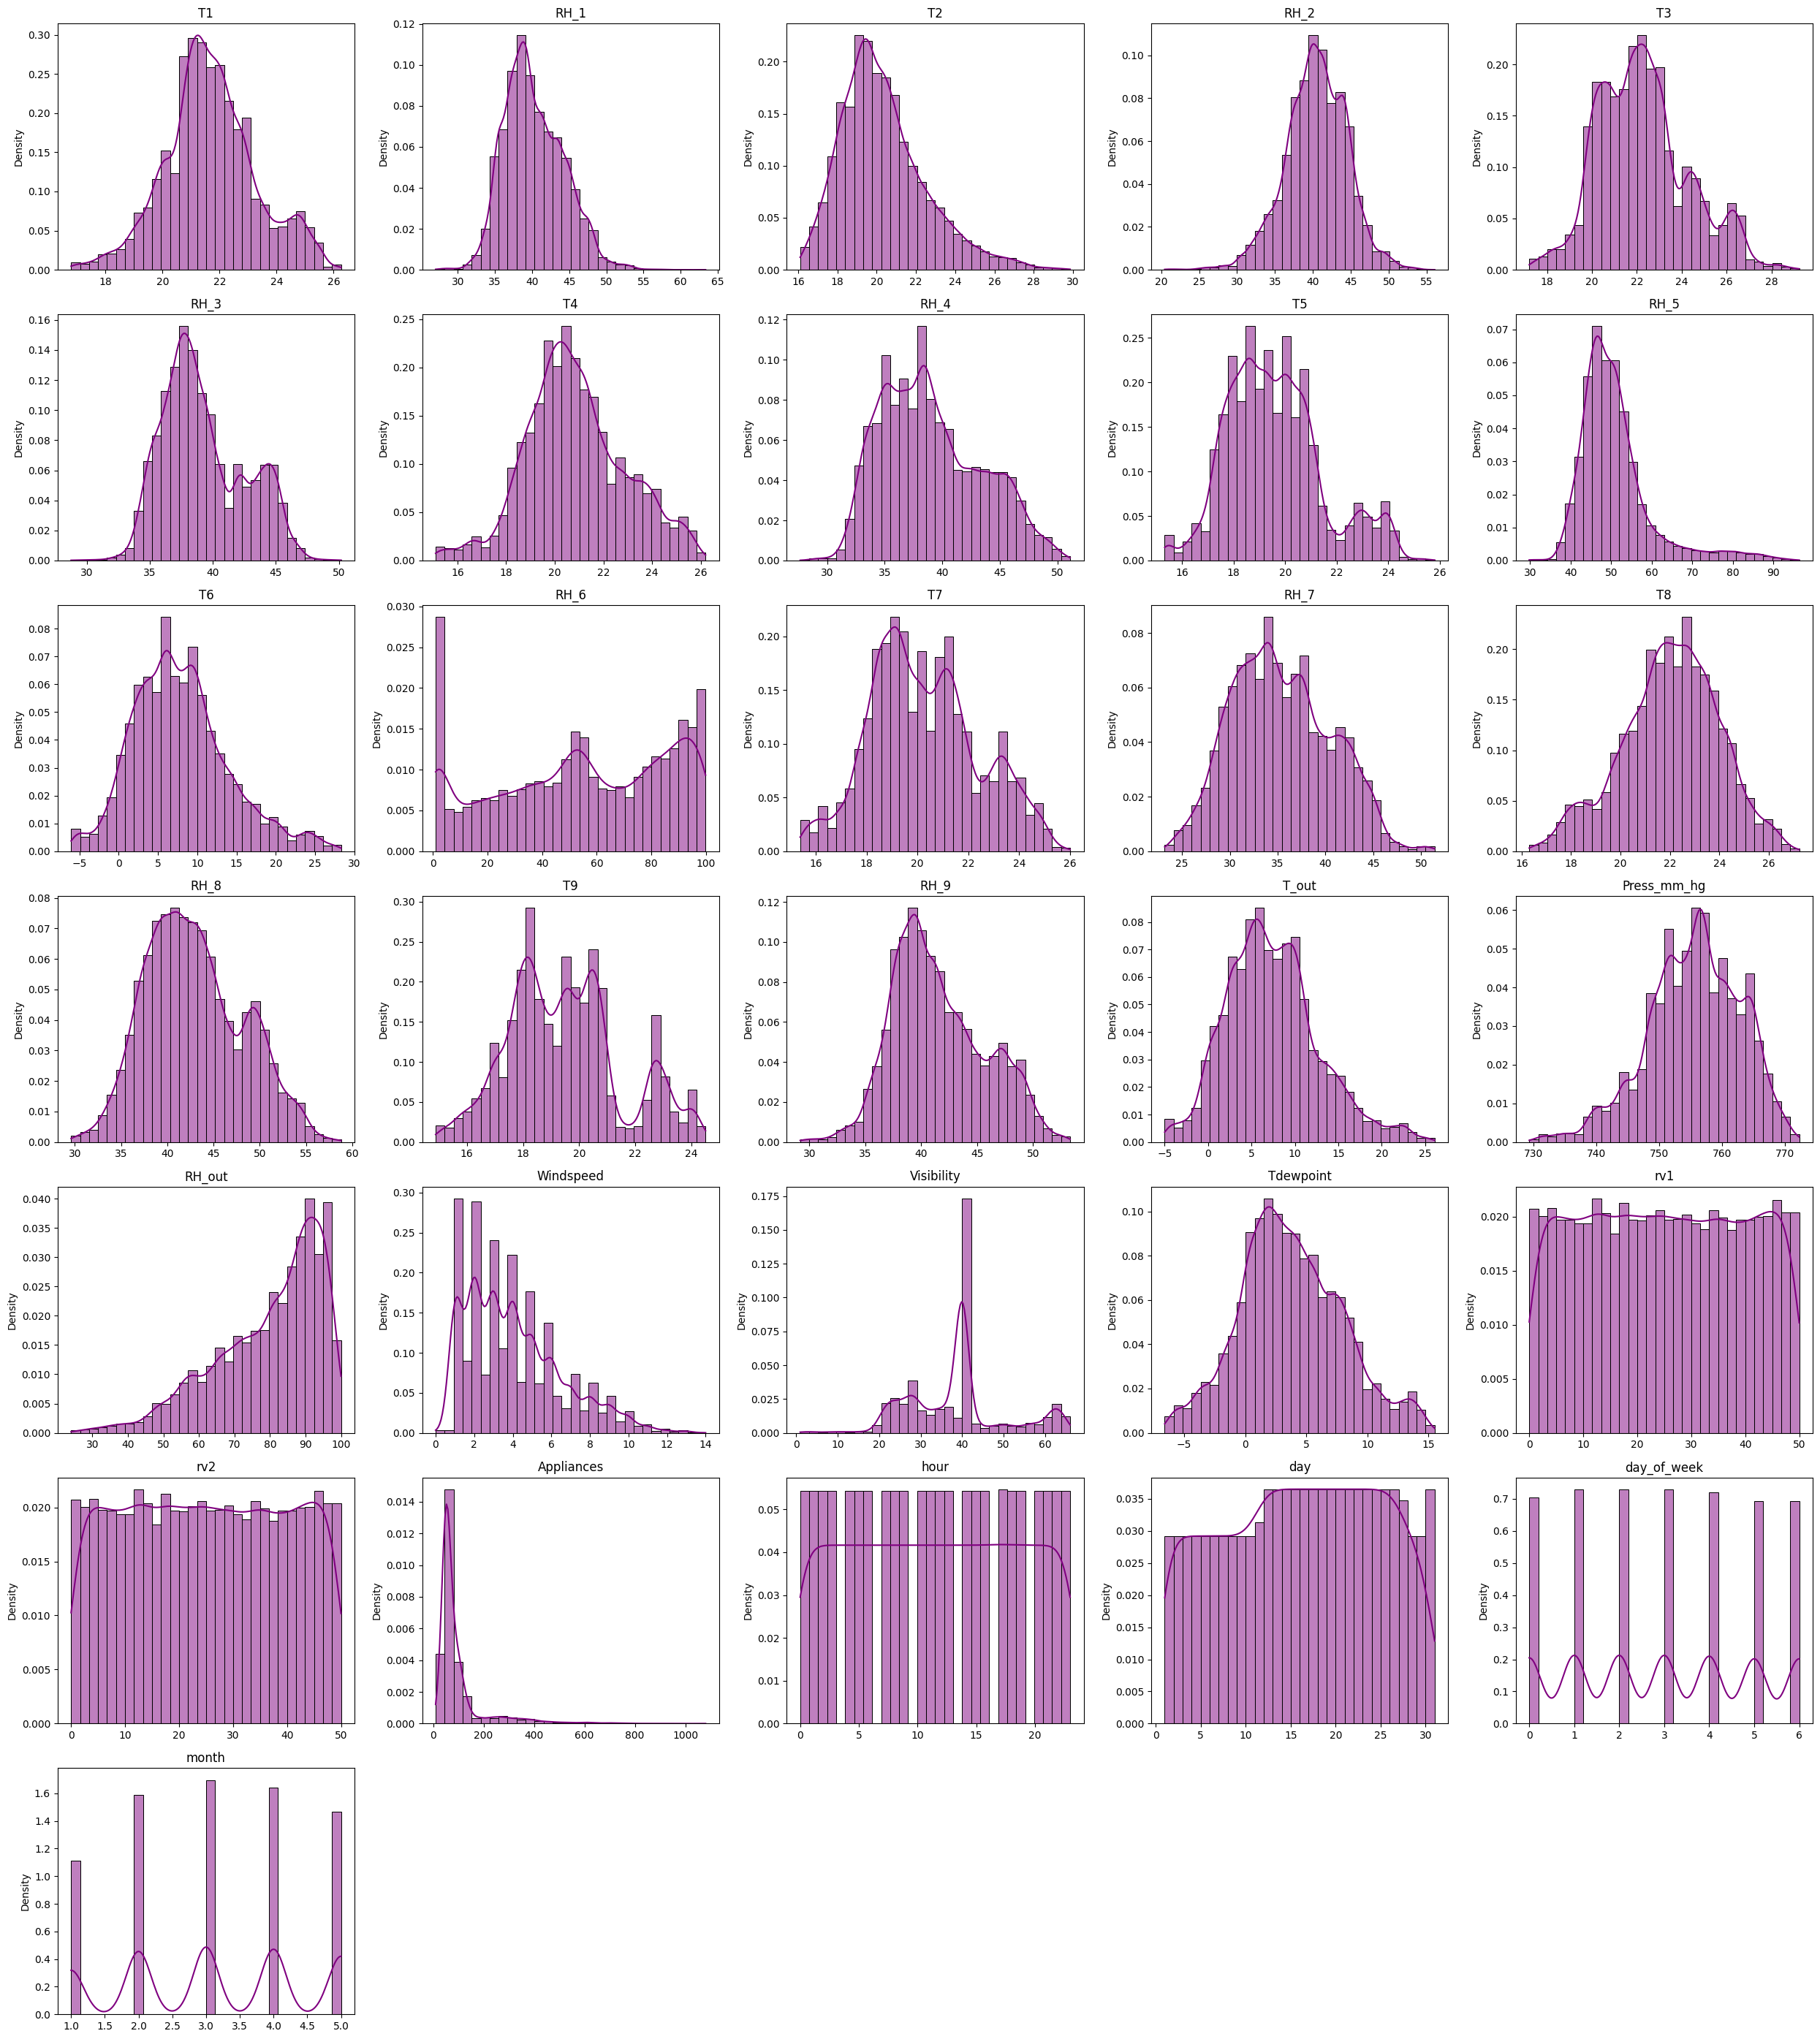

In [9]:
n_cols = 5
n_rows = math.ceil(len(numerical_features.columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(numerical_features[column], kde=True, color='purple', stat='density', bins=30)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

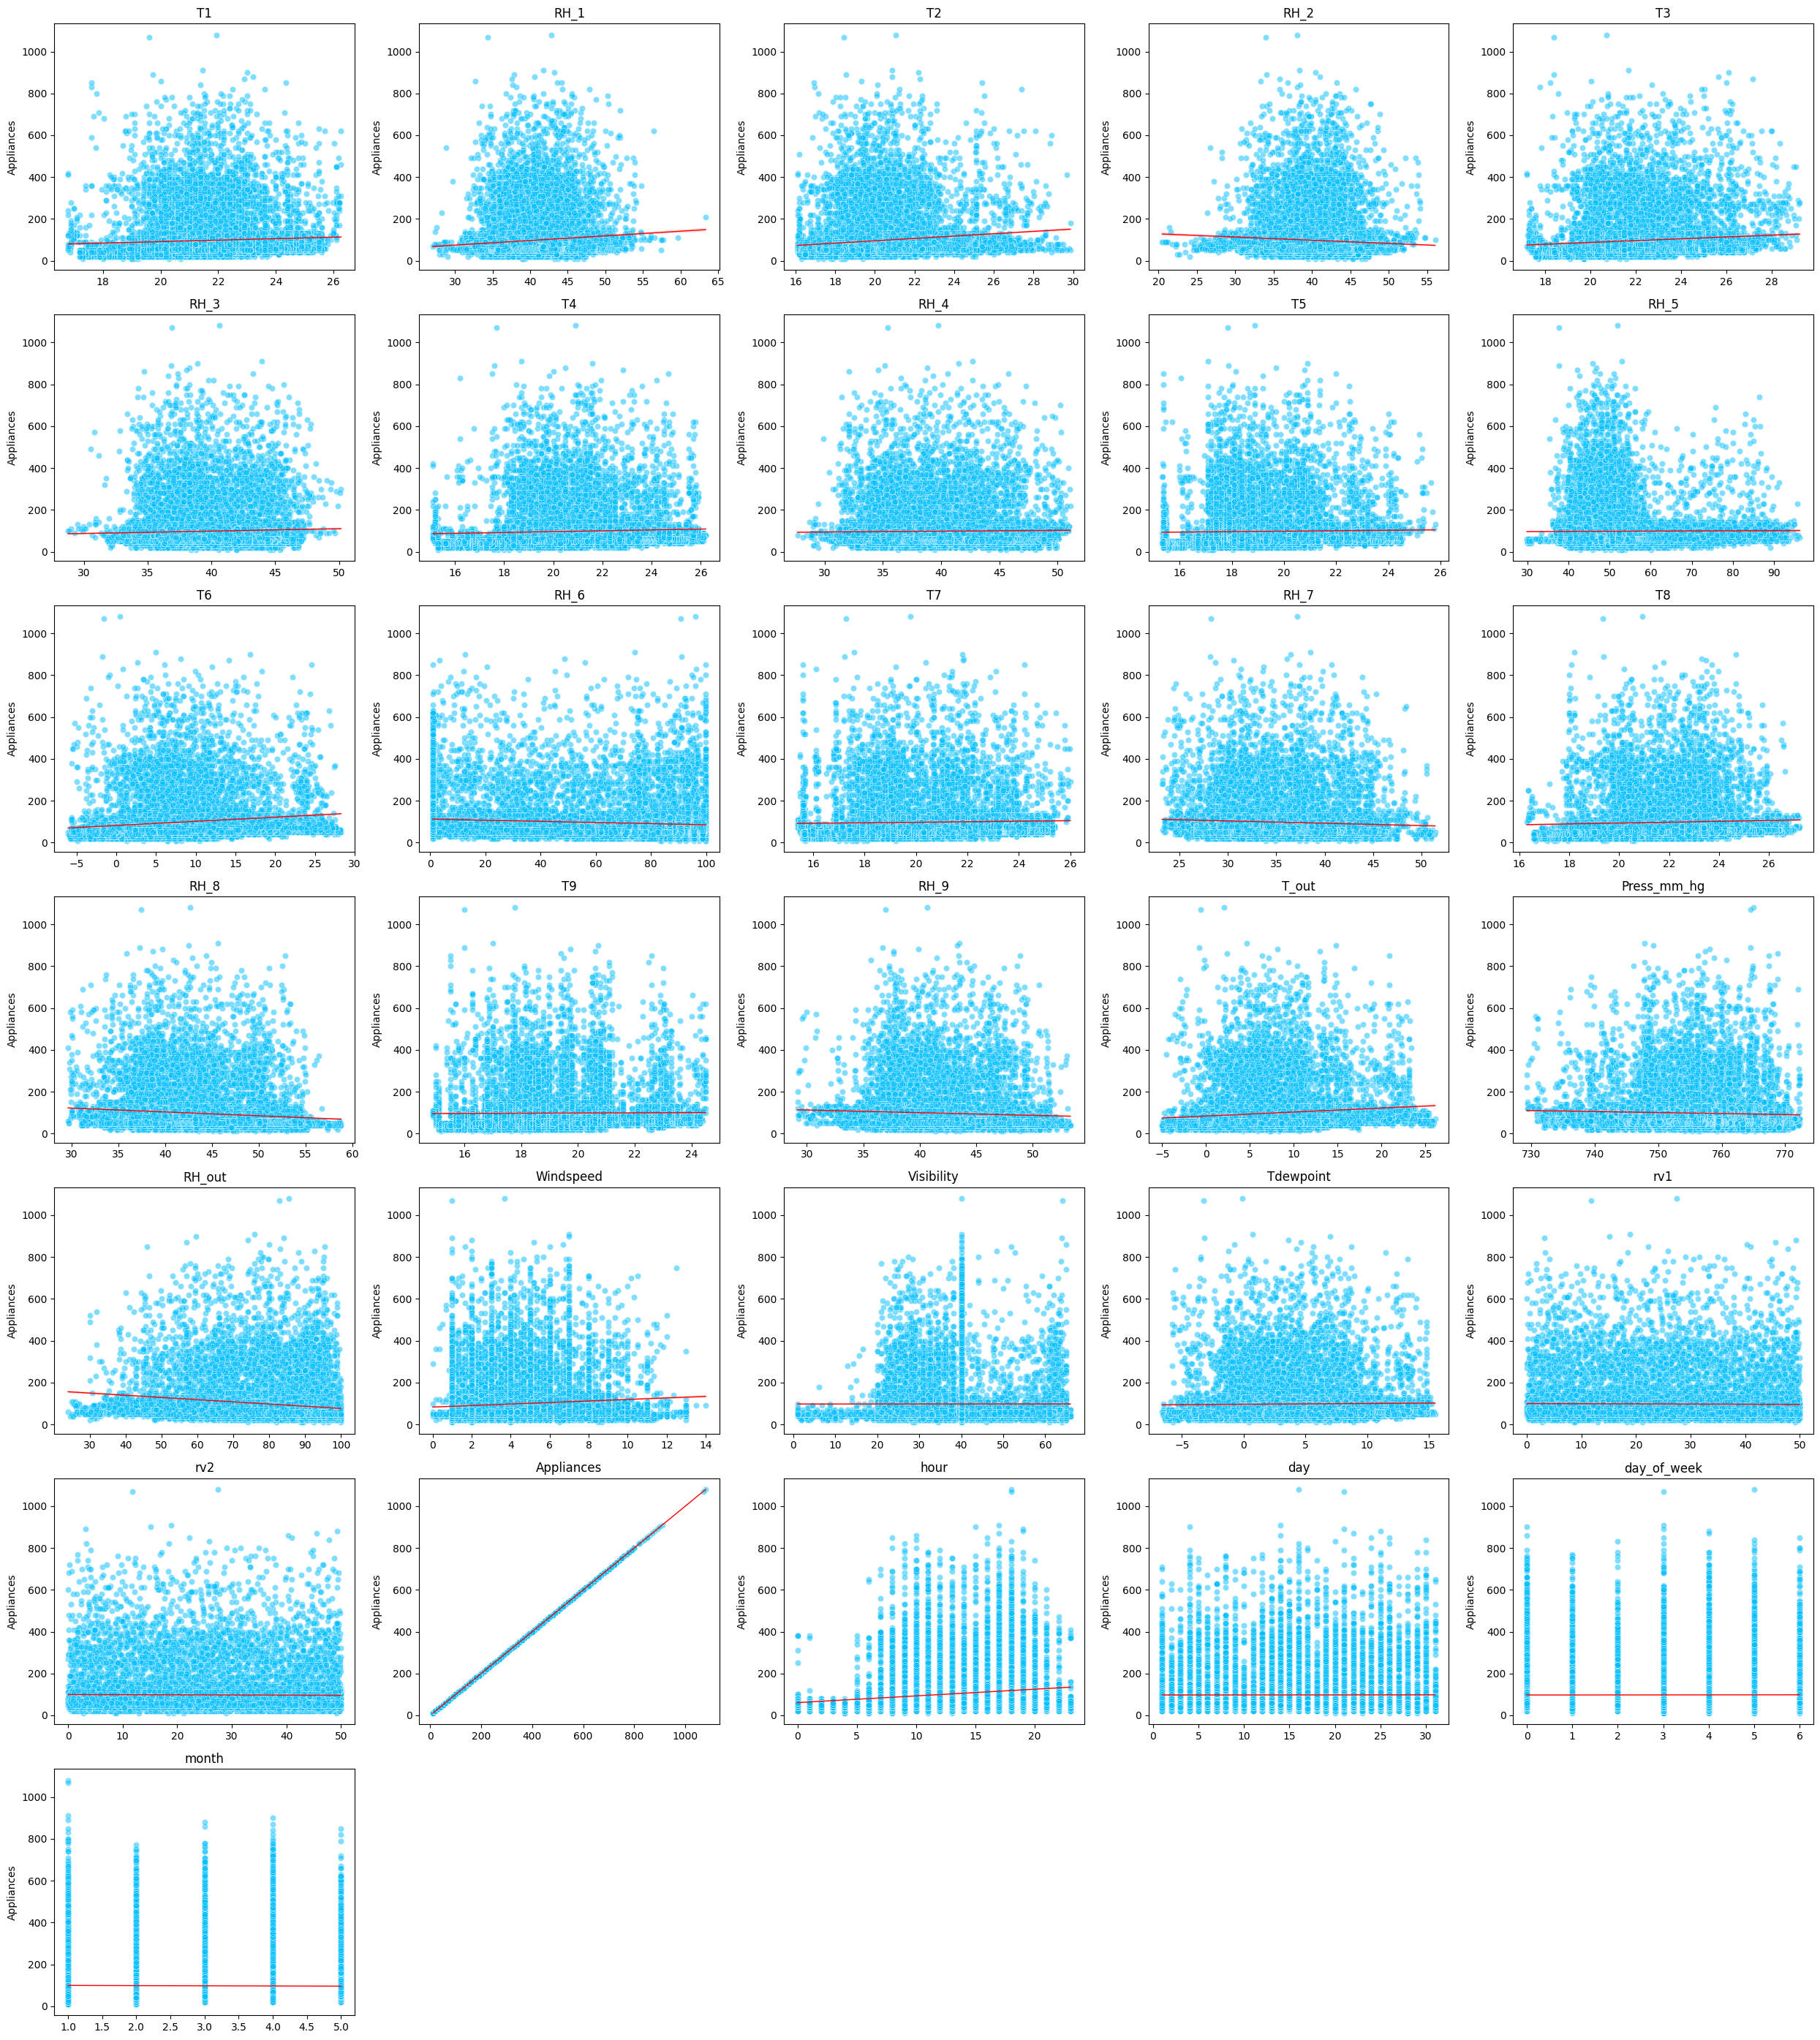

In [10]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=numerical_features[column], y=dependent_variable, color='deepskyblue', alpha=0.5)
    sns.regplot(x=numerical_features[column], y=dependent_variable, scatter=False, color='red', line_kws={'linewidth': 1})
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Appliances")
    
plt.tight_layout()
plt.show()

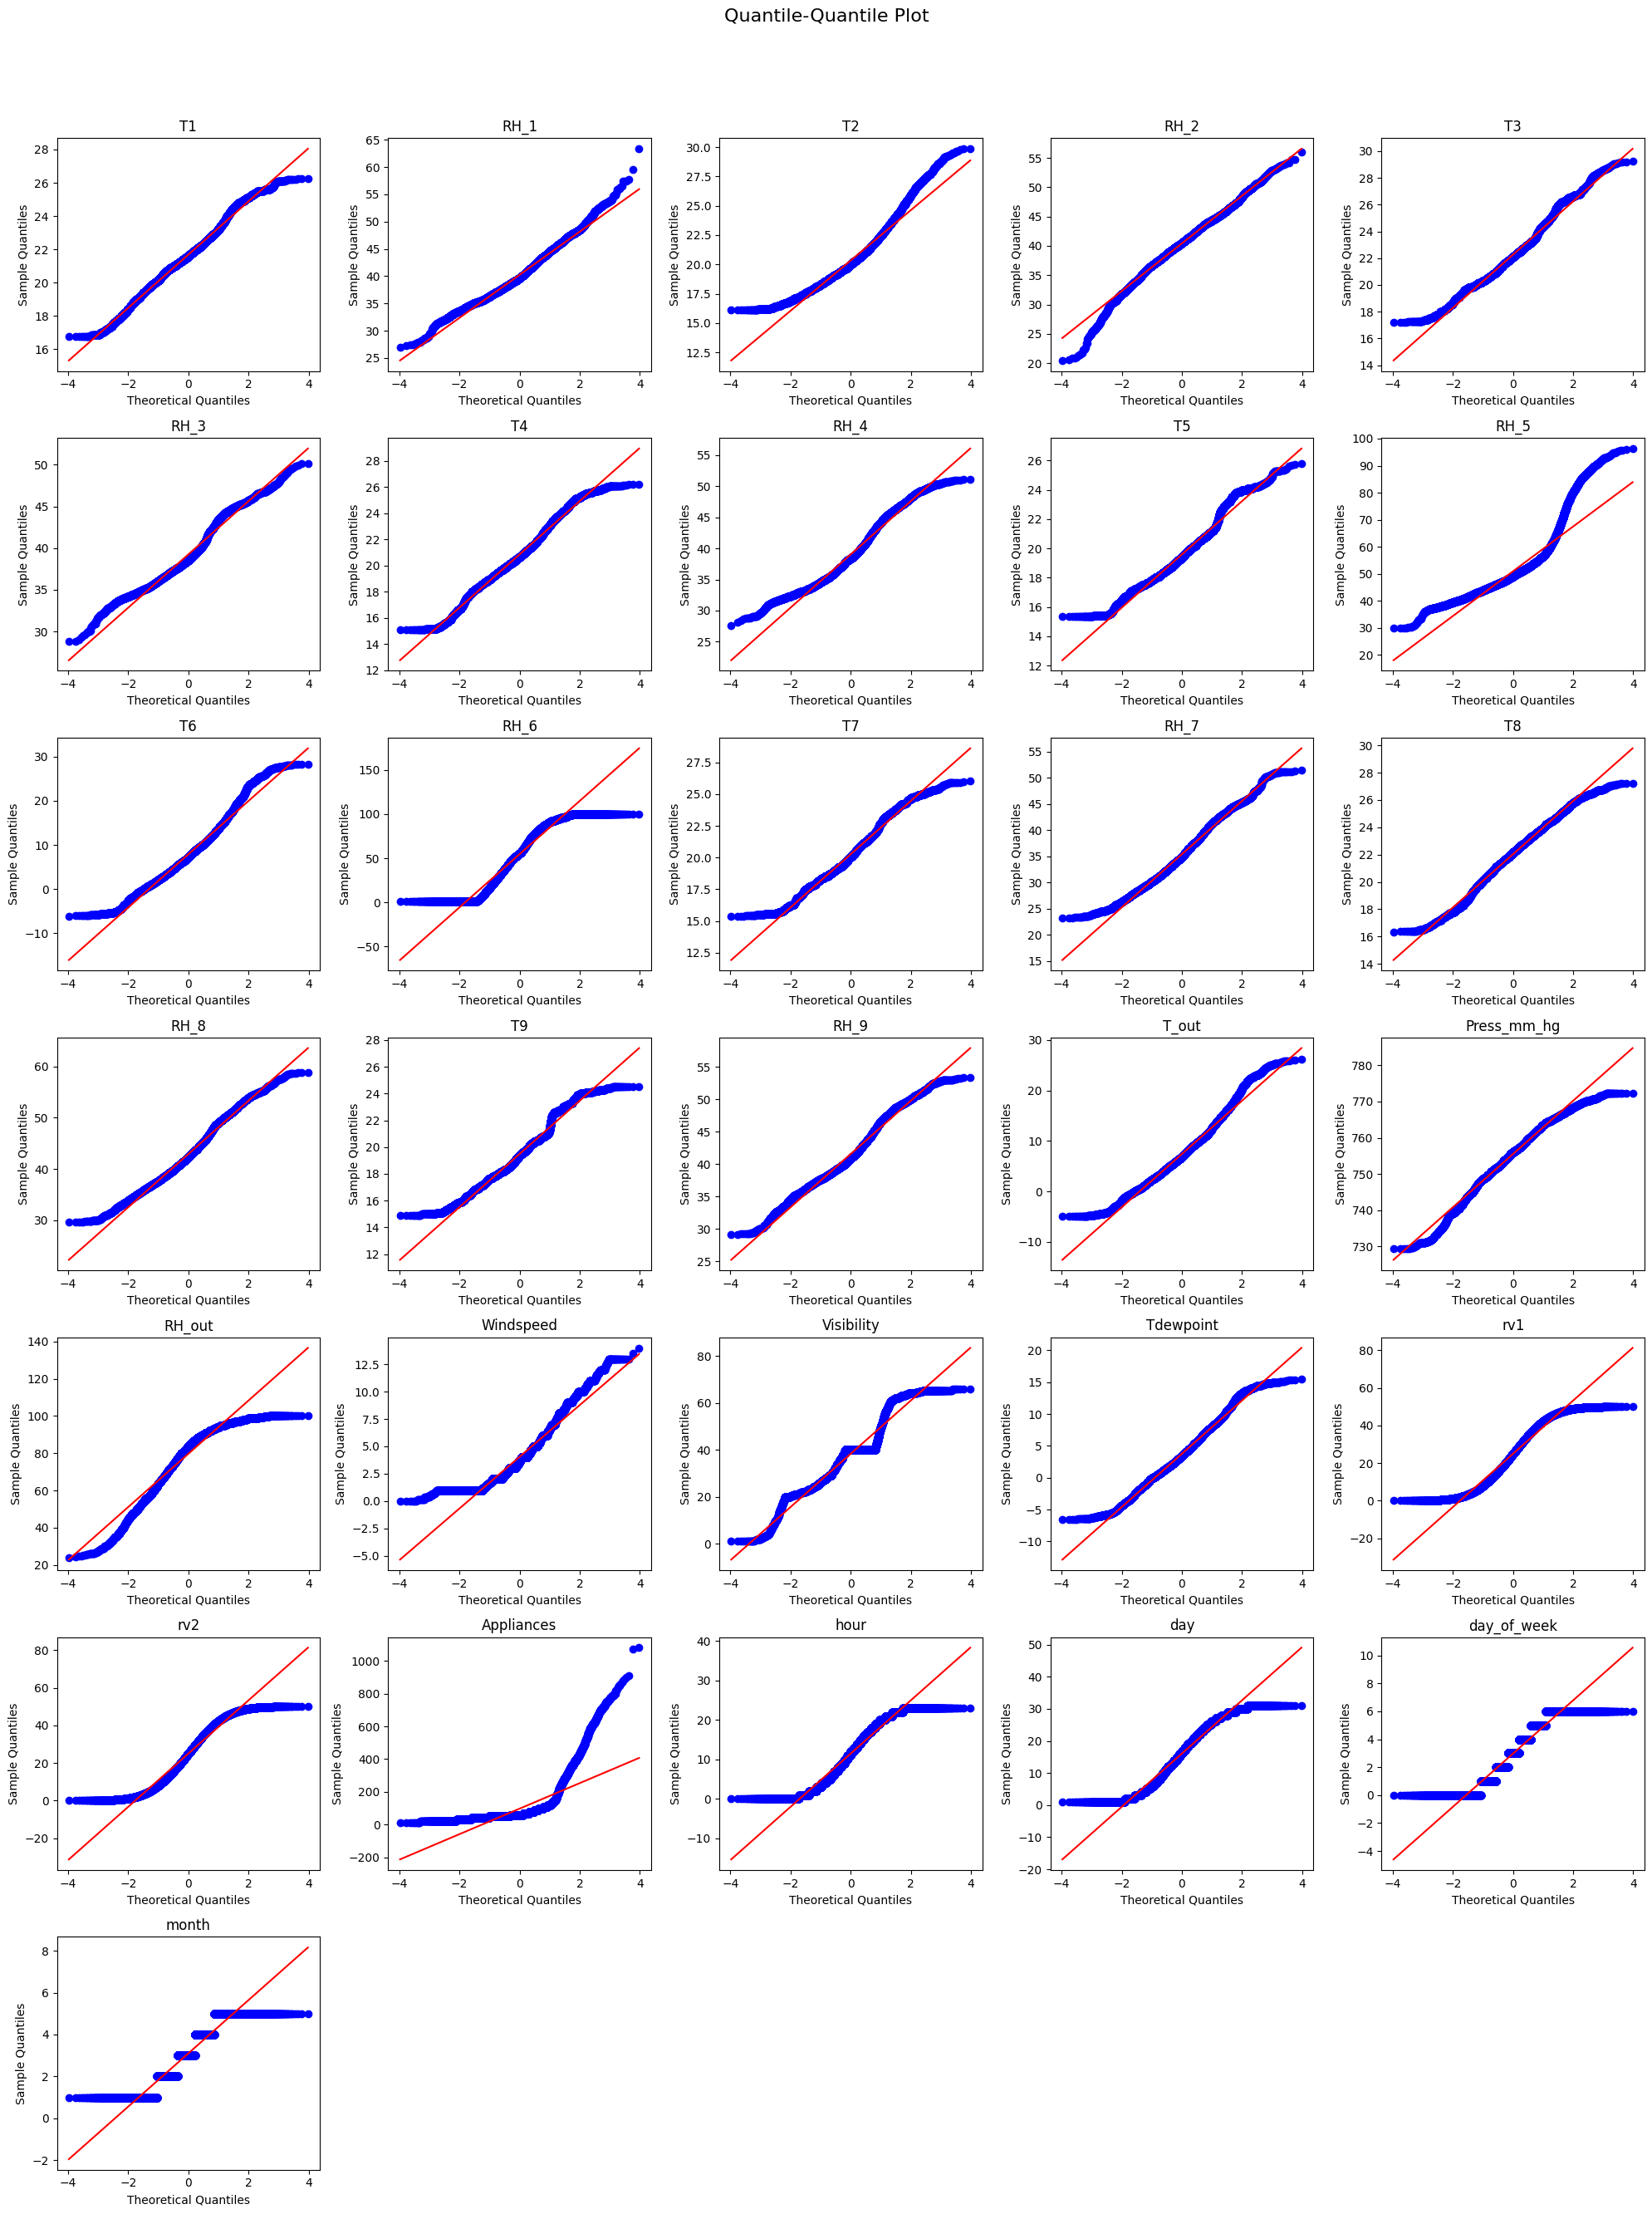

In [11]:
# Quantile-Quantile Plot for Normality Check
plt.figure(figsize=(n_cols * 4, n_rows * 4))
plt.suptitle("Quantile-Quantile Plot", fontsize=16)

# Plot each variable
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    stats.probplot(numerical_features[column].dropna(), dist="norm", plot=plt)
    plt.title(column)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

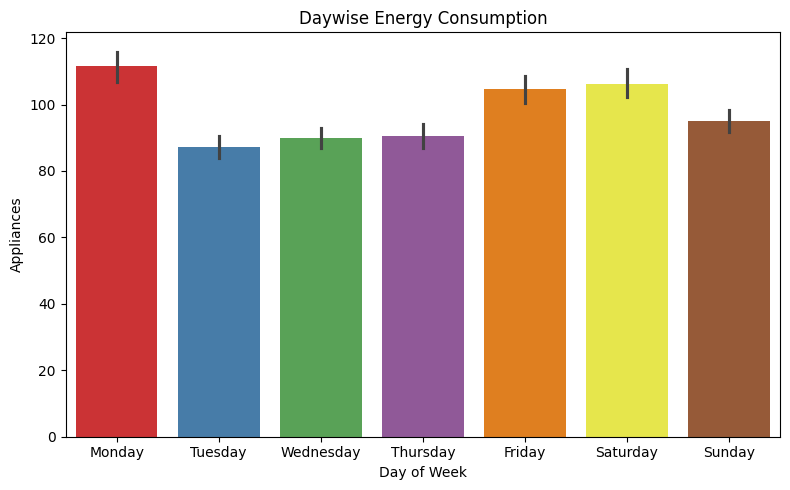

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='day_name', y='Appliances', hue = 'day_name' , legend= False, errorbar='ci', palette='Set1')  # Or try 'Set1'
plt.title("Daywise Energy Consumption")
plt.xlabel("Day of Week")
plt.ylabel("Appliances")
plt.tight_layout()
plt.show()

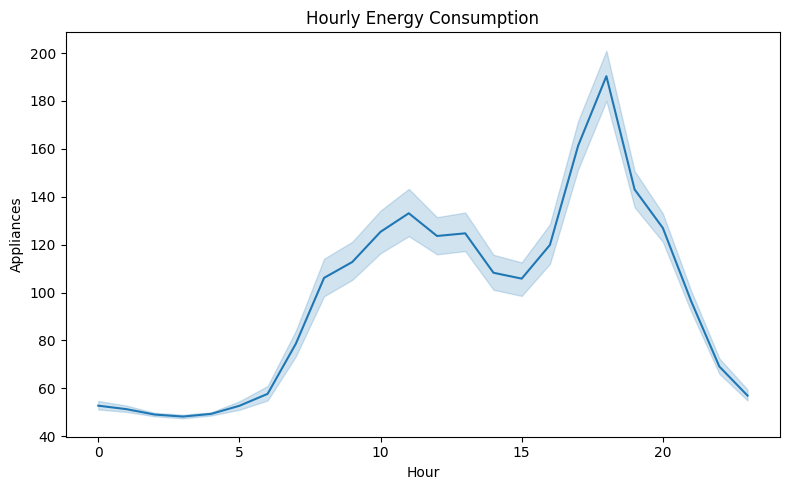

In [13]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=numerical_features, x='hour', y='Appliances', errorbar='ci')
plt.title("Hourly Energy Consumption")
plt.xlabel("Hour")
plt.ylabel("Appliances")
plt.tight_layout()
plt.show()

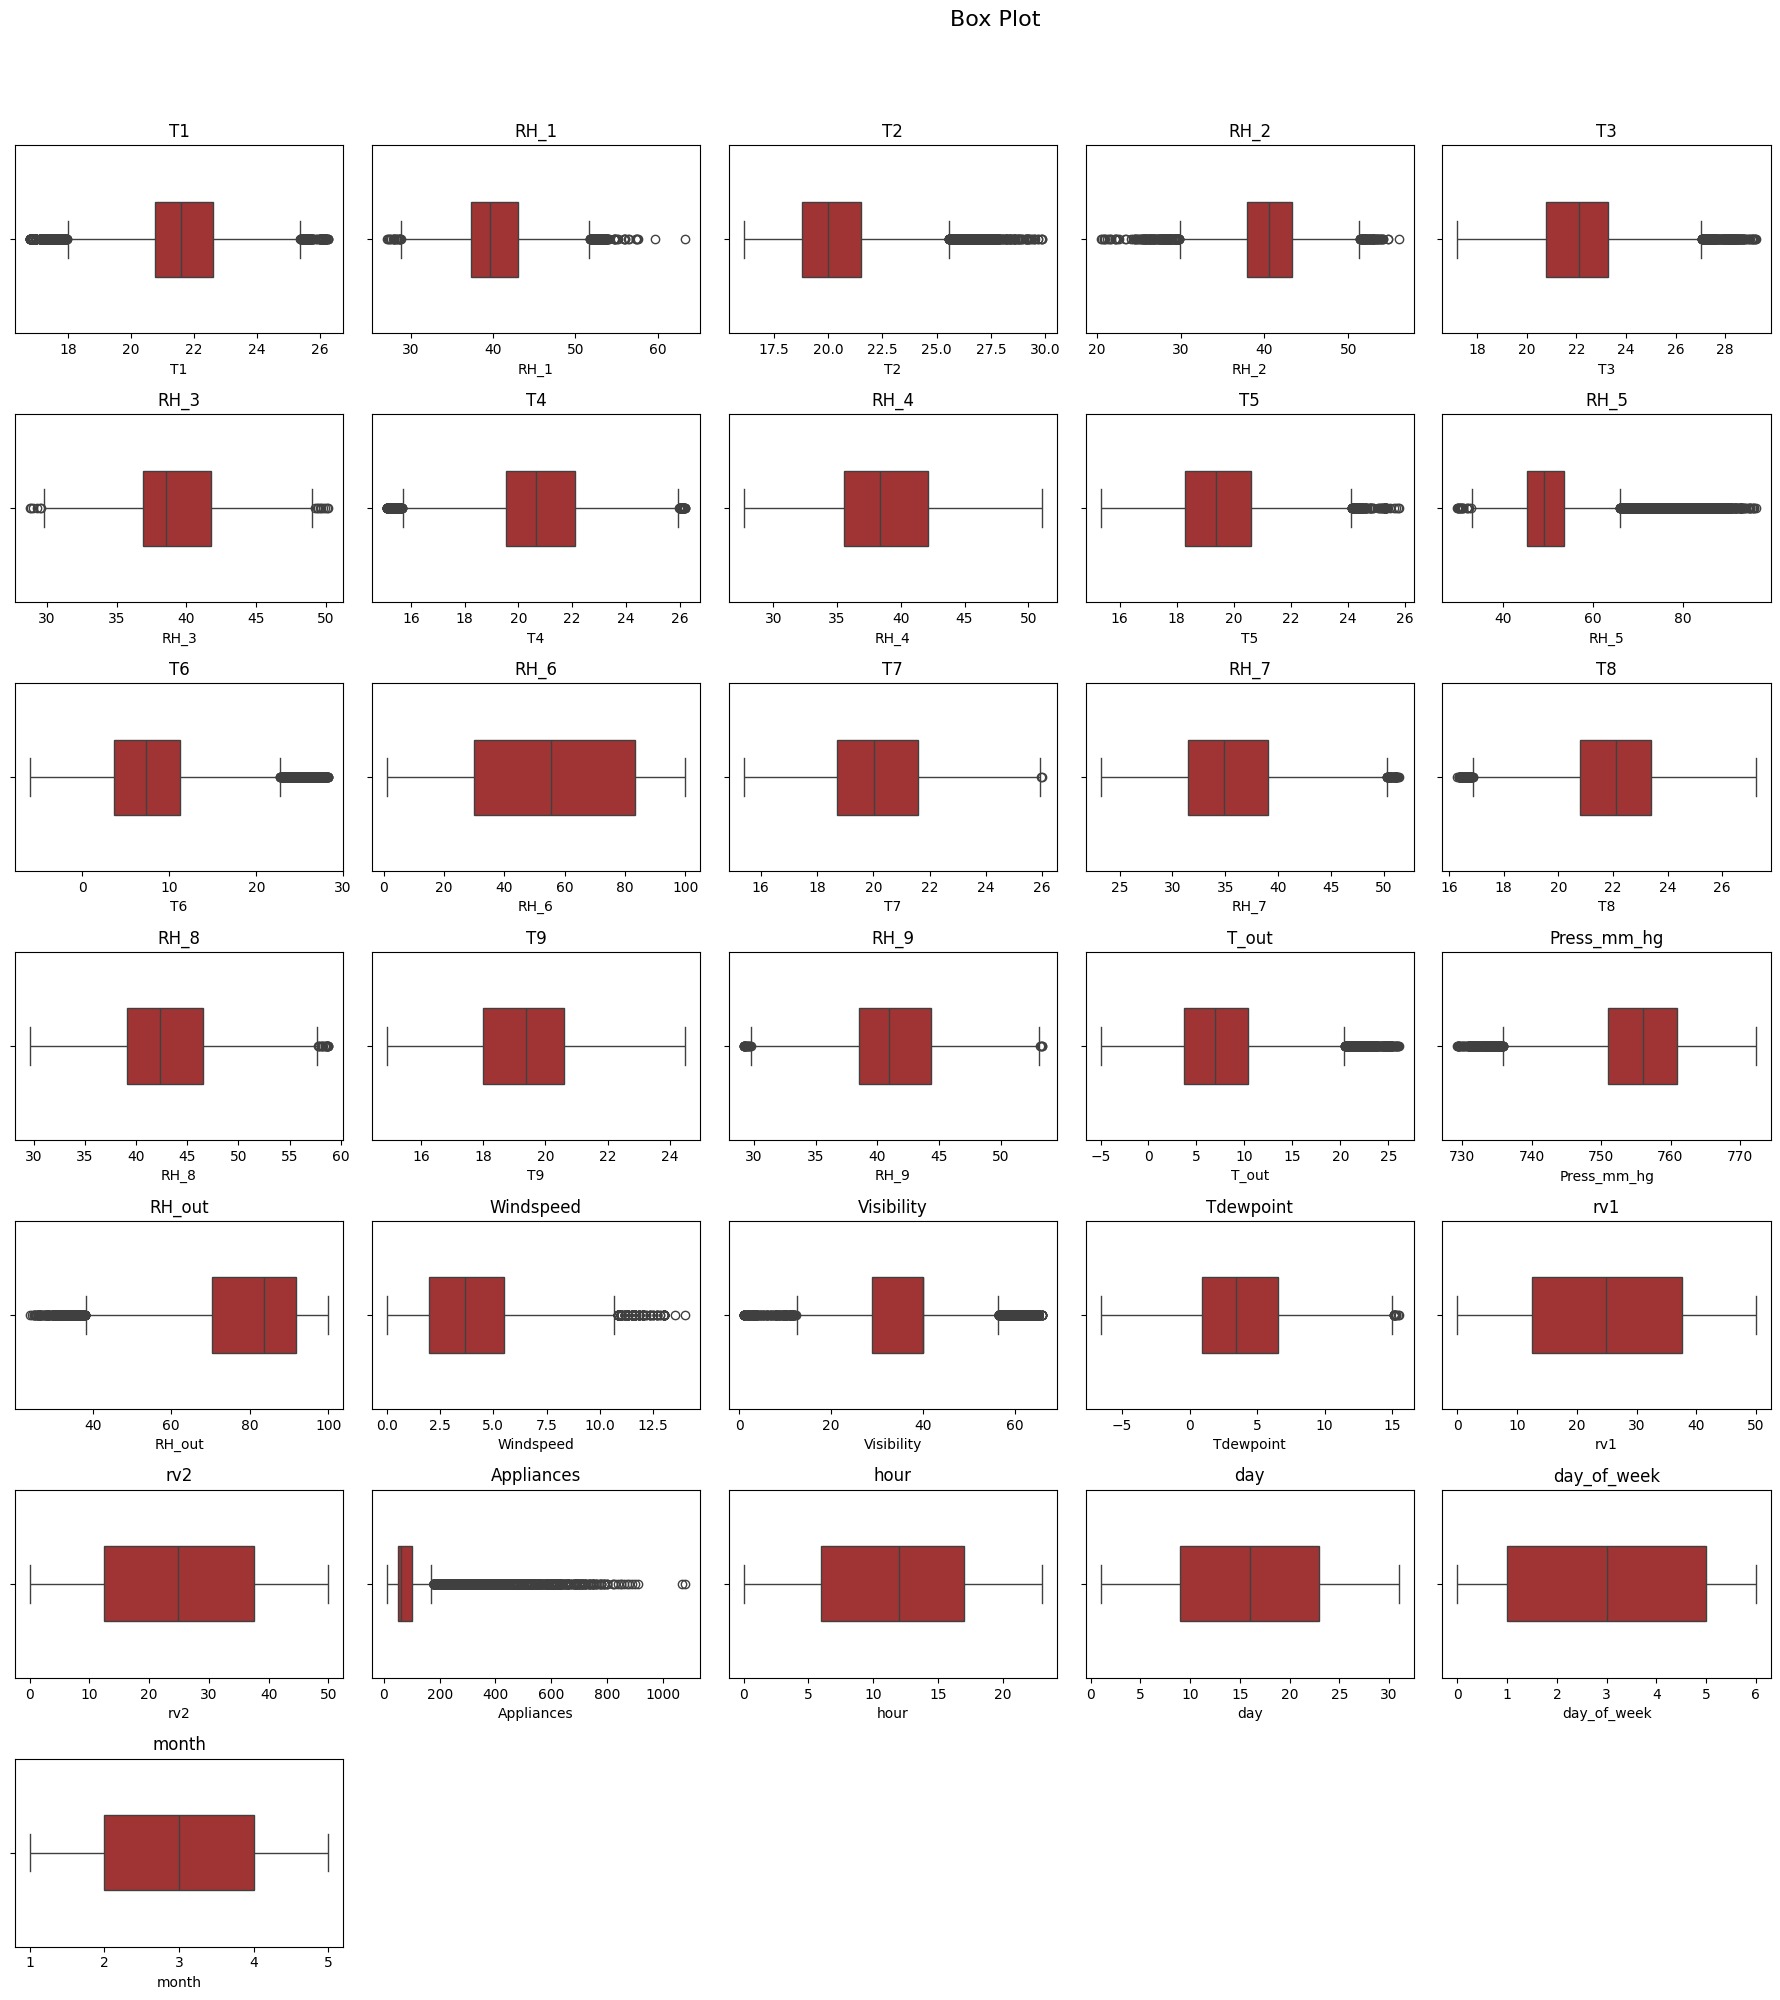

In [14]:
# Box plot 

# Create figure
plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle("Box Plot", fontsize=16)

# Plot each boxplot
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=numerical_features[column], color='firebrick', width=0.4)
    plt.title(column)

plt.tight_layout(rect=[0, 0.03, 0.90, 0.95])
plt.show()